# Comparing with Michele, plus differences

## Setup

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from astropy.cosmology import FlatLambdaCDM

In [3]:
%cd ../Xi0Stat



/Users/af/Work/Cosmo/codes/Xi0Stat/Xi0Stat


In [4]:
from globals import * 
from GW import get_all_events
from GLADE import GLADE
from GWENS import GWENS
from SYNTH import SYNTH
from completeness import *
from galCat import GalCompleted
from GWgal import GWgal


In [5]:
%load_ext autoreload
%autoreload 2

## Set global prior range! 
reload GW events after change! 
reset GWgal object after change to either GWs or gal! 

In [6]:
lims = PriorLimits() 
lims.Xi0min=0.01
lims.Xi0max=10
lims.H0min=67.9
lims.H0max=67.9



In [42]:

O2 = get_all_events(lims, loc='data/GW/O2/', verbose=True, level=0.98, subset=True, subset_names=['GW170608','GW150914', 'GW170814', 'GW151226'])
#O2 = get_all_events(lims, loc='data/GW/O2/', verbose=True, level=0.96, subset=False)
#O2 = get_all_events(lims, loc='data/GW/O2/', verbose=True, level=0.99, subset=True, subset_names=['GW150914', 'GW151226'])
#O2 = get_all_events(lims, loc='data/GW/O2/', verbose=True, level=0.99, subset=True, subset_names=['GW150914'])
#O2 = get_all_events(lims, loc='data/GW/O2/', verbose=True, level=0.999, subset=True, subset_names=['GW170817'])


GW events:
['GW151226', 'GW170608', 'GW170814', 'GW150914']
Reading skymaps....


/Users/af/miniconda3/envs/cobenv/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


Credible region set to 98.0 %
Number of std in redshift: 2.3263478740408408


/Users/af/miniconda3/envs/cobenv/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


Credible region set to 98.0 %
Number of std in redshift: 2.3263478740408408
Credible region set to 98.0 %
Number of std in redshift: 2.3263478740408408
Credible region set to 98.0 %
Number of std in redshift: 2.3263478740408408


## Completeness

In [21]:
from completeness import LoadCompleteness

compl = SkipCompleteness()

goal = get_SchNorm(phistar=phiBstar07, Lstar=LBstar07, alpha=alphaB07, Lcut=0.6)
print(goal)
#goal = 0.1

maskcompl = MaskCompleteness(comovingDensityGoal=goal, nMasks=9, zRes=30)

loadcompl = LoadCompleteness(comovingDensityGoal=goal, fname='Michele_B.txt', interpolateOmega=False)


#compl = SuperpixelCompleteness(comovingDensityGoal=goal, angularRes=4, interpolateOmega=False, zRes=40)



0.007237888703693824
32 32 25


## GLADE

In [43]:
# uncomment to compute posteriors and save. then put file into GLADE folder, comment, and proceed. 
#skipcompl = SkipCompleteness()
#glade = GLADE('GLADE', skipcompl, useDirac=False, computePosterior=False, verbose=True, colnames_final = ['theta','phi','z','z_err', 'z_lower', 'z_lowerbound', 'z_upper', 'z_upperbound', 'w', 'K', 'B_Abs'])
#glade.data.to_csv('posteriorglade.csv', index=False)  

## ---------------------------------------------------------- ##

#glade = GLADE('GLADE', compl, useDirac=False, finalData='posteriorglade.csv', verbose=True)
band = 'B'
Lcut = 0.6
maskcompl = MaskCompleteness(comovingDensityGoal=goal, nMasks=9, zRes=30)
#gladePost = GLADE('GLADE', maskcompl, useDirac=False, finalData='posteriorglade.csv', verbose=True, band=band, Lcut=Lcut)

#glade = GLADE('GLADE', loadcompl, band=band, Lcut = Lcut, useDirac=True, computePosterior=False, verbose=True)
gladeM = GLADE('GLADE', maskcompl, band=band, Lcut = Lcut, useDirac=True, computePosterior=False, verbose=True)
#glade = gladePost 

Loading GLADE from /Users/af/Work/Cosmo/codes/Xi0Stat/Xi0Stat/../data/GLADE/GLADE_2.4.txt...
N. of objects: 3263611
Dropping galaxies with HyperLeda name=null and flag2=2...
Kept 3262083 points or 100% of total
Computing cosmological redshifts from given luminosity distance with H0=70.0 km / (Mpc s), Om0=0.27...
Interpolating between z_min=0, z_max=6.49511599474
2720966 points have valid entry for dist
541117 points have null entry for dist, correcting original redshift
Loading galaxy group catalogue from /Users/af/Work/Cosmo/codes/Xi0Stat/Xi0Stat/../data/misc/Galaxy_Group_Catalogue.csv...
Keeping only galaxies with positive redshift in the colums z_cosmo_CMB...
Kept 2720852 points or 83% of total
Renaming column z_cosmo_CMB to z. This will be used in the analysis.
Adding errors on z with GLADE values
Computing total luminosity in B band...
Applying cut in luminosity in B-band. Selecting galaxies with B_Lum>0.6 x L_* = 1.47
Kept 1148638 points or 42% of total
Using B_Lum for weighting


(361.4351781913467, 128.11011166662928, 594.7602447160642, 100.29672222642881)


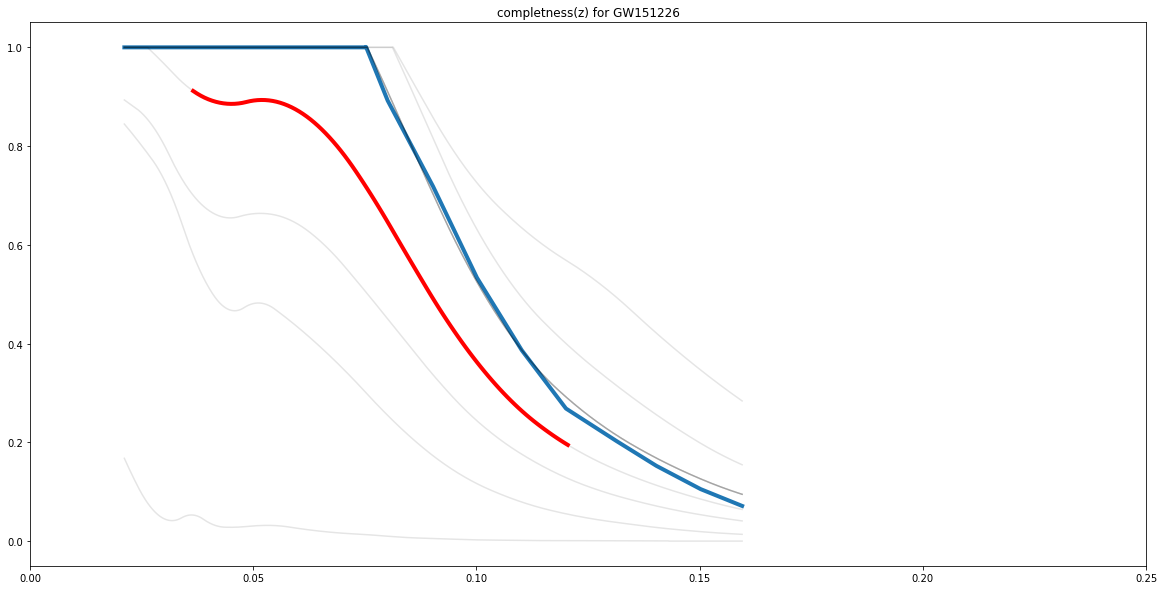

1.000000001
1.000000001
1.000000001
0.7530710137055021
0.6966630690664207
0.5789444189500585
0.4051590315845857
0.3037490816254627
0.25848348727103365
0.15887291890021127
0.09385460740680066
1e-09
1e-09
1e-09
1e-09
(297.0918455136463, 164.623736547006, 429.55995448028665, 56.942519407703486)


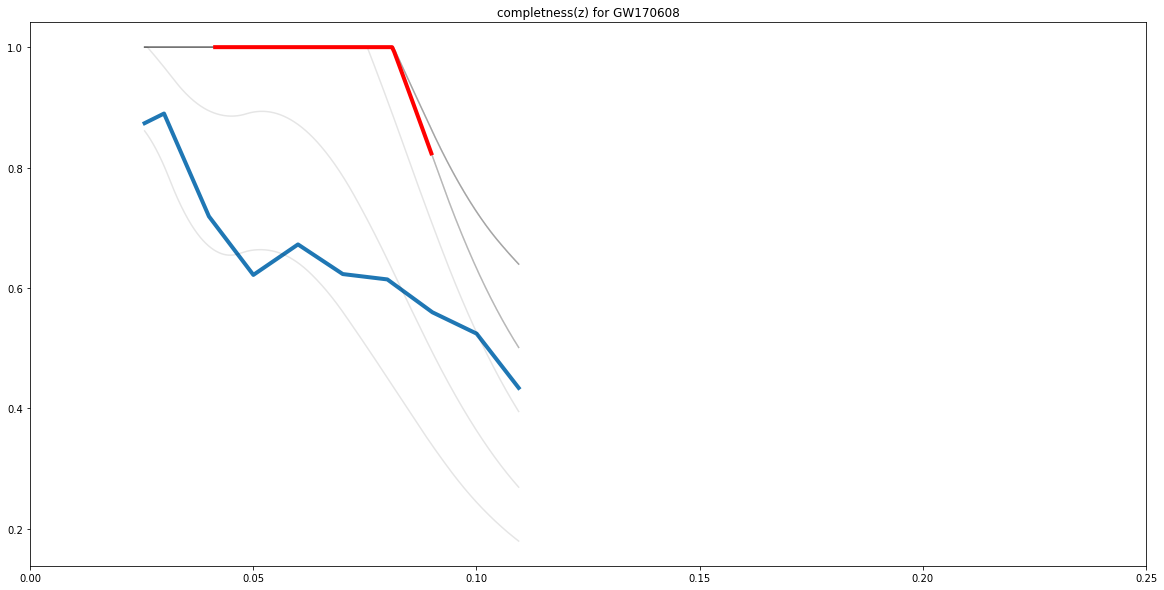

1.000000001
1.000000001
1.000000001
0.7530710137055021
0.6966630690664207
0.5789444189500585
0.4051590315845857
0.3037490816254627
0.25848348727103365
0.15887291890021127
0.09385460740680066
1e-09
1e-09
1e-09
1e-09
(534.1608896107473, 286.0236379057784, 782.2981413157161, 106.66386333440198)


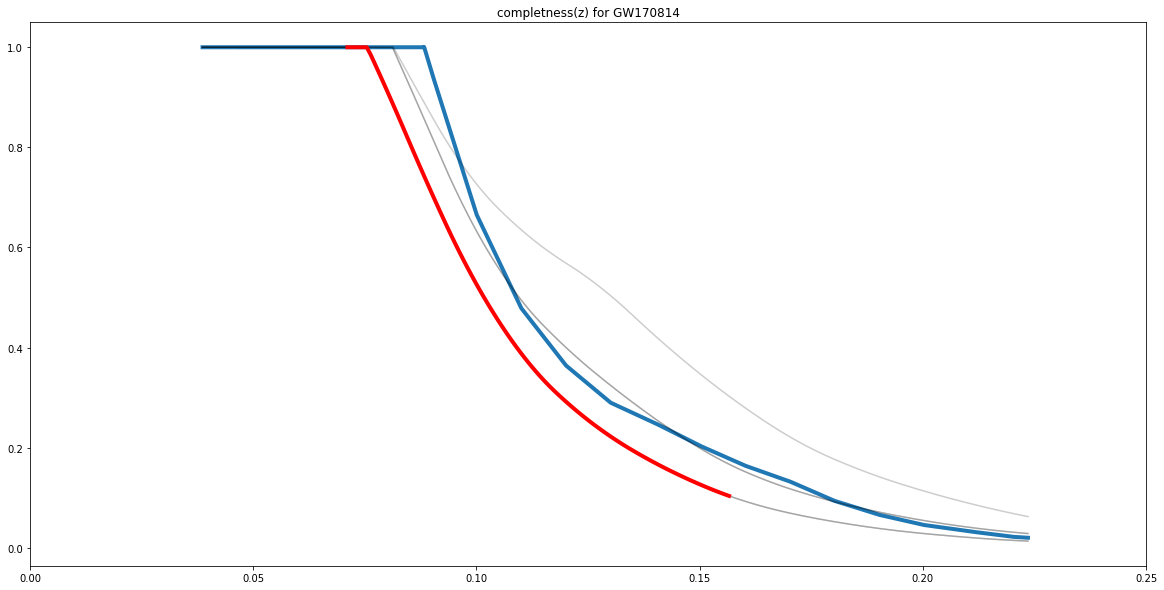

1.000000001
1.000000001
1.000000001
0.7530710137055021
0.6966630690664207
0.5789444189500585
0.4051590315845857
0.3037490816254627
0.25848348727103365
0.15887291890021127
0.09385460740680066
1e-09
1e-09
1e-09
1e-09
(386.8800074693133, 211.0728606493576, 562.6871542892691, 75.57216561707972)


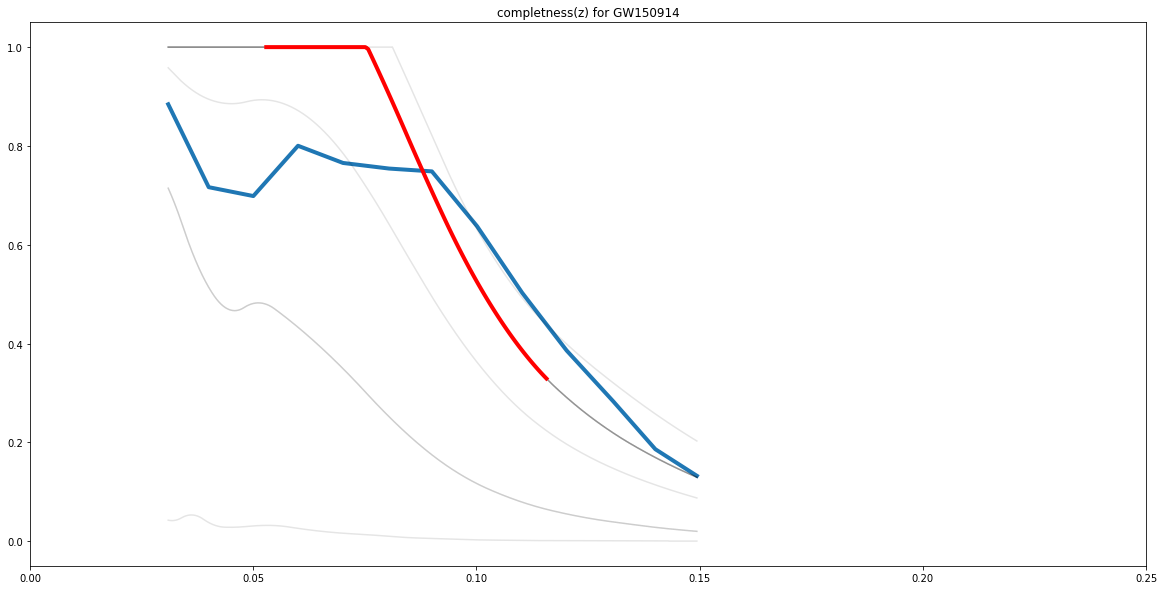

1.000000001
1.000000001
1.000000001
0.7530710137055021
0.6966630690664207
0.5789444189500585
0.4051590315845857
0.3037490816254627
0.25848348727103365
0.15887291890021127
0.09385460740680066
1e-09
1e-09
1e-09
1e-09


In [46]:
for key, ev in O2.items():
    plt.figure(figsize=(20,10))
    print(ev.find_r_loc())
    zmin, zmax = ev.get_z_lims()
    mu, l, u, sig = ev.find_r_loc(std_number=2)
    zl = z_from_dLGW(l, H0=70, Xi0=1, n=nGlob)
    zu = z_from_dLGW(u, H0=70, Xi0=1, n=nGlob)
    
    z = np.linspace(zmin, zmax, 10000)
    
    c = glade.completeness(*ev.find_event_coords(polarCoords=True), z) 
    plt.plot(z, c, linewidth=4)
    #plt.show()
   
    nSamples = 10
    theta, phi, _ = ev.sample_posterior(nSamples=nSamples)
    c = gladeM.completeness(theta, phi, z)
    plt.plot(z, c.T, c='k', alpha=0.1)
    
    z = np.linspace(zl, zu, 100)
    c = gladeM.completeness(*ev.find_event_coords(polarCoords=True), z)
    plt.plot(z, c, linewidth=4, c='r')
    plt.title('completness(z) for ' + key)
    #plt.legend(['on central event location and in limits of prior range'] + nSamples*['on randomly sampled event locations'] + ['event size for default fiducial cosmology'])
    #plt.ylim([0,1])
    plt.xlim([0,0.25])

    plt.show()
    
    
    for i in range(15):
        z = 0.02*i + 0.037
        print(glade.completeness(theta = np.pi*(1/2+1/6), phi = 0, z=z))

In [19]:
gladeM._completeness.zedges = []
gladeM._completeness.zcenters = []
gladeM._completeness._nSide = 32
gladeM._completeness._nMasks = 9
gladeM._completeness._zRes = 30

gladeM._completeness._compl = []
gladeM._completeness._interpolators = []
gladeM._completeness._zstar = []

gladeM._completeness.compute(gladeM.get_data(), useDirac=True)

Computing completeness
Making masks...
Preparing further... 
Computing in parallel... 
Final computations for completeness...
Done.


(-0.1, 1.1)

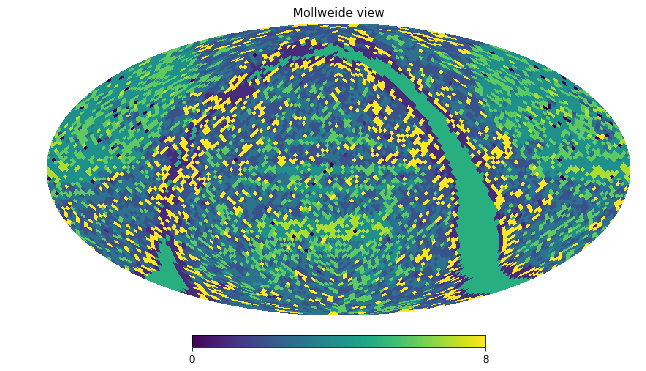

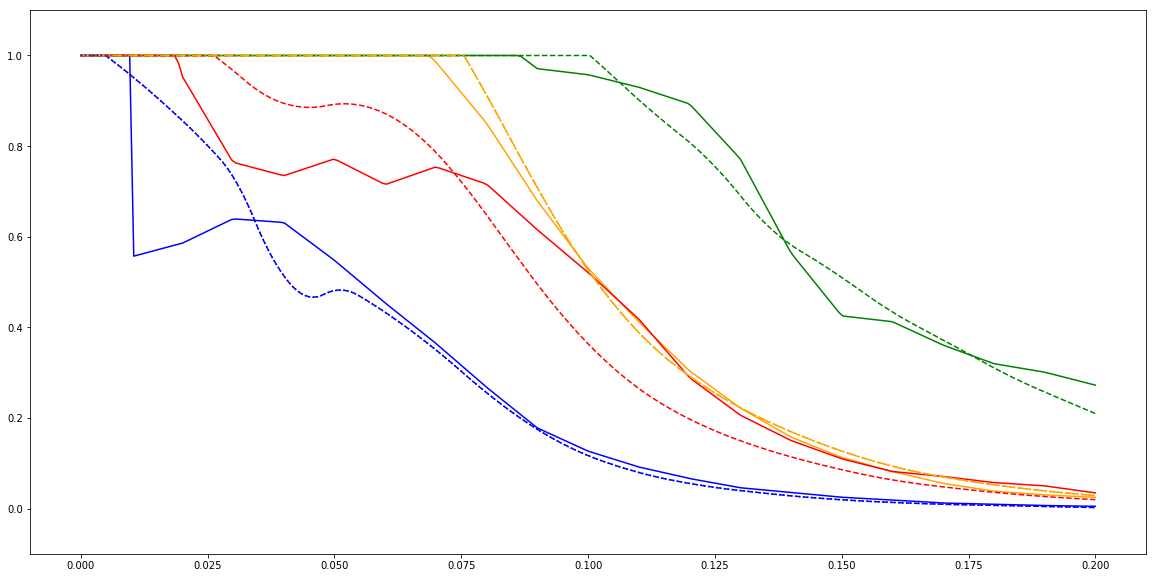

In [47]:
n= 250

res = np.zeros((n,15))
zs = np.linspace(0.0,0.2,n)

thetas = np.linspace((2/12)*np.pi,(10/12)*np.pi,5)
phis = np.linspace(0,0*4*np.pi*2,5)
res = glade._completeness.get(thetas, phis, zs)
resM = gladeM._completeness.get(thetas, phis, zs)

from scipy.signal import savgol_filter
resMF = savgol_filter(resM, 61, 2, deriv=0, axis=1)


hp.mollview(gladeM._completeness._mask)
plt.figure(figsize=(20,10))
plt.plot(zs,res[0,:], 'b')
plt.plot(zs,res[1,:], 'orange')
plt.plot(zs,res[3,:], 'g')
plt.plot(zs,res[4,:], 'r')

plt.plot(zs,resM[0,:], 'b', ls='--')
plt.plot(zs,resM[1,:], 'orange', ls='--')
plt.plot(zs,resM[3,:], 'g', ls='--')
plt.plot(zs,resM[4,:], 'r', ls='--')
plt.plot(zs,resM[1,:], 'orange', ls='-.')
plt.plot(zs,resM[0,:], 'b', ls=':')
from scipy import interpolate
for i, data in enumerate(gladeM._completeness._compl):
    #print(gladeM._completeness.zcenters[i])
    inter = interpolate.interp1d(gladeM._completeness.zcenters[i], data, kind='linear', bounds_error=False, fill_value=(1,0))
    #plt.plot(zs, inter(zs), 'k',ls=':')
    
plt.ylim([-0.1, 1.1])
# plt.plot(zs,resMF[0,:], 'b', ls='--')
# plt.plot(zs,resMF[1,:], 'orange', ls='--')
# plt.plot(zs,resMF[3,:], 'k', ls='--')
# plt.plot(zs,resMF[4,:], 'r', ls='--')
# plt.plot(zs,resMF[1,:], 'orange', ls='-.')
# plt.plot(zs,resMF[0,:], 'b', ls=':')

In [71]:
d = glade.get_data()

d.loc[:,'pix'] = hp.ang2pix(32, d.theta, d.phi)
d.set_index(keys=['pix'], drop=False, inplace=True)
        
#        # need to iterate through pixels...
#        print('Preparing... ')
#        for i in np.arange(self._npix):
#            if (i % np.int(self._npix/30)) == 0:
#                print('#', end='', flush=True)
#            if i in galdata.index:
#                X[i,0] = len(galdata.loc[[i]])
#            else:
#                X[i,0] = 
print(d.groupby(level=0).size())

print(d.groupby(level=0).w.sum()/4)

pix
10065     27
10193    133
10320     32
10321     57
10444    299
        ... 
12078     35
12079     62
12080     54
12081     19
12118      4
Length: 177, dtype: int64
pix
10065     24.787149
10193    135.742123
10320     31.053550
10321     55.154722
10444    271.774965
            ...    
12078     35.739098
12079     61.201255
12080     64.105202
12081     24.258032
12118      3.816393
Name: w, Length: 177, dtype: float64


## Computing posterior

In [23]:
a = np.linspace(start=20, stop=100, num=100,endpoint=False) #Delta H0=60/npoints
b = np.linspace(start=100, stop=140, num=10,endpoint=True)    #Delta H0= 4
H0grid  = np.sort(np.concatenate([a, b]))
H0grid = np.linspace(20,220,300)
H0grid = np.linspace(67.0,67.0,1)
Xi0grid = np.linspace(1,1,1)    
Xi0grid = np.linspace(0.1,10,100)    

        
#H0grid = np.linspace(70, 70, 1)
#Xi0grid = np.linspace(0.3,10,60)

In [25]:

gals = GalCompleted(completionType='add')
gals.add_cat(glade)

myGWgal = GWgal(gals, O2)

# Compute likelihood for H0 on a grid





#If false, use diracs
myGWgal._galRedshiftErrors = False
#myGWgal._galRedshiftErrors = True

# 400 gives reasonable but noisy results. Will need >> 10k for production 
myGWgal.nHomSamples = 100


liks = myGWgal.get_lik(H0s=H0grid, Xi0s=Xi0grid, n=nGlob)

#d = myGWgal.gals._galcats[0].get_data()

# from keelin import *
# grid, pdf = bounded_keelin_3(0.16, d.z_lower, d.z, d.z_upper, d.z_lowerbound, d.z_upperbound, N=10, P=0.9999999, computePDF = True)

# plt.plot(grid[:,:].T, pdf[:,:].T)
# plt.ylim([0,100])
# plt.show()

#print(d.z_err)

0.99 credible region for GW151226: area=1871.0 deg^2 (0.57 rad^2), volume= 3.07e+07 Mpc^3 (with Planck15 cosmology)
Restricting area of the catalogue to 35660 pixels with nside=256
55894 galaxies kept
Setting z range of the catalogue between 0.017, 0.166
45176 galaxies kept
0.99 credible region for GW150914: area=504.0 deg^2 (0.153 rad^2), volume= 6.82e+06 Mpc^3 (with Planck15 cosmology)
Restricting area of the catalogue to 38416 pixels with nside=512
11681 galaxies kept
Setting z range of the catalogue between 0.028, 0.155
10565 galaxies kept


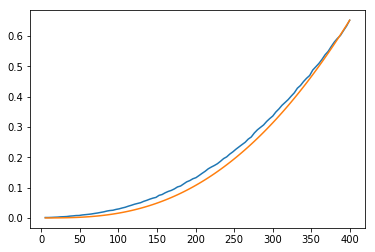

In [92]:
from Xi0Stat.betaFit import BetaFit
from Xi0Stat.betaMC import BetaMC

bfit = BetaFit()
bmc = BetaMC(lims, properAnisotropy=False)


#bfitres = bfit.get_beta(H0grid, Xi0grid)
#bmcres = bmc.get_beta(H0grid, Xi0grid)
#bmcres2 = bmc.get_beta(H0grid, Xi0grid)

#bmcres_zMax = bmc.get_beta(H0grid, Xi0grid)
bmcres = bmcres_zMax

#plt.plot(H0grid, bfitres)
plt.plot(H0grid, bmcres*bfitres[-1]/bmcres[-1])

#plt.plot(H0grid, bmcres2*bfitres[-1]/bmcres2[-1])

r = 200
bhomres = H0grid**3 / (1+np.array([z_from_dLGW(r, Xi0=1, n=nGlob, H0 = h) for h in H0grid]))**3

plt.plot(H0grid, bhomres*bfitres[-1]/bhomres[-1])


In [23]:
plt.figure(figsize=(15,10))
bfitres2 = bfitres
plt.plot(H0grid, bfitres)
plt.plot(H0grid, bfitres2/bfitres2[-1]*bfitres[-1])

from scipy.signal import savgol_filter
bmcresfilterd = savgol_filter(bmcres, 27, 4, deriv=0)
#bmcresfilterd2 = savgol_filter(bmcres2, 27, 4, deriv=0)
plt.plot(H0grid, bmcresfilterd*bfitres[-1]/bmcresfilterd[-1], '--')
#plt.plot(H0grid, bmcresfilterd2*bfitres[-1]/bmcresfilterd2[-1], '--')


r = 300 
bhomres = H0grid**3 / (1+np.array([z_from_dLGW(r*1.5, Xi0=1, n=nGlob, H0 = h) for h in H0grid]))**3
#r = 1200 
#bhomres2 = H0grid**3 / (1+np.array([z_from_dLGW(r*1.5, Xi0=1, n=nGlob, H0 = h) for h in H0grid]))**3


#plt.plot(H0grid, bhomres*bfitres[-1]/bhomres[-1])
#plt.plot(H0grid, bhomres2*bfitres[-1]/bhomres2[-1])
plt.legend(['Fit zR=0.4', 'Fit zR=10', 'MC isotrop','MC equator'])#,'Simple(r=450)'])


plt.show()
plt.title('relative error of log derivs')
plt.plot(H0grid, (np.gradient(np.log(bfitres2), H0grid)-np.gradient(np.log(bmcresfilterd), H0grid))/np.gradient(np.log(bmcresfilterd), H0grid))
plt.plot(H0grid, (np.gradient(np.log(bfitres2), H0grid)-np.gradient(np.log(bhomres), H0grid))/np.gradient(np.log(bhomres), H0grid))
plt.plot(H0grid, (np.gradient(np.log(bmcresfilterd), H0grid)-np.gradient(np.log(bhomres), H0grid))/np.gradient(np.log(bhomres), H0grid))
#plt.plot(H0grid, (np.gradient(np.log(bmcresfilterd2), H0grid)-np.gradient(np.log(bhomres), H0grid))/np.gradient(np.log(bhomres), H0grid))
plt.ylim([-0.1,0.1])
plt.legend(['Fit vs. MC', 'Fit vs Simple(r=450)', 'MC vs Simple(r=450)', 'MC2 vs Simple' ])

plt.show()

Xi0grid = np.linspace(0.01, 10, 100)
d = 450 
betaXi0 = 1 / np.array([Xi(z_from_dLGW(d, Xi0=Xi0, n=nGlob, H0 = 70), Xi0, n=nGlob)*(1+z_from_dLGW(d, Xi0=Xi0, n=nGlob, H0 = 70)) for Xi0 in Xi0grid])**3

plt.plot(H0grid, np.gradient(np.log(bfitres2), H0grid))
plt.show()

plt.plot(Xi0grid, np.gradient(np.log(betaXi0), H0grid))

NameError: name 'bfitres' is not defined

<Figure size 1080x720 with 0 Axes>

## Plot H0 results 

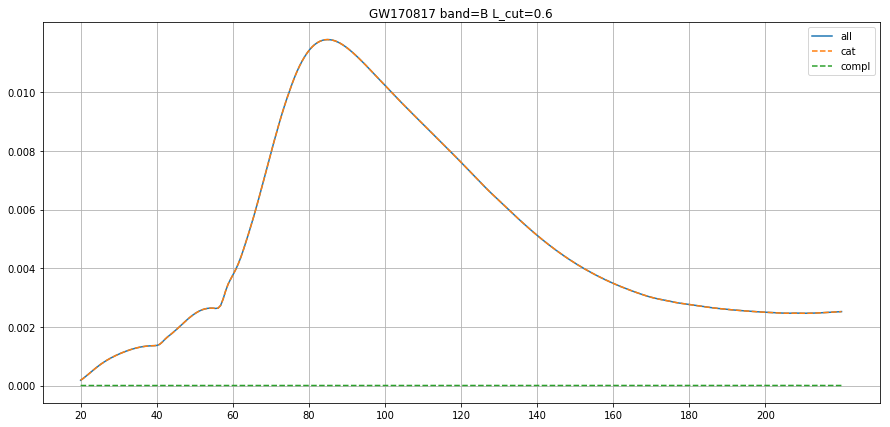

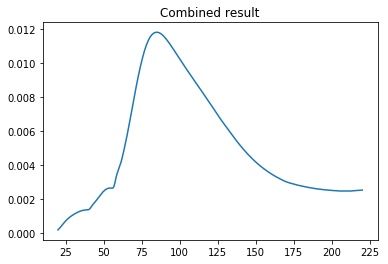

In [24]:


lik = np.squeeze(np.ones((H0grid.size, Xi0grid.size)))
bet = np.squeeze(np.ones((H0grid.size, Xi0grid.size)))

for key, val in liks.items():
    
    r, _, _, _ = O2[key].find_r_loc()

    #beta = bfitres
    #r 
    beta = H0grid**3 / (1+np.array([z_from_dLGW(r*1.5, Xi0=1, n=nGlob, H0 = h) for h in H0grid]))**3

    fig = plt.figure(figsize=(15,7))
    norm = 1/np.trapz((val[0]+1*val[1])/beta, H0grid)
    plt.plot(H0grid, norm*(val[0]+1*val[1])/beta)
    plt.plot(H0grid, norm*val[0]/beta, '--')
    plt.plot(H0grid, norm*val[1]/beta, '--')
    
    plt.legend(["all", "cat", "compl"])
    plt.title( key + " band=" + band + " L_cut=" + str(Lcut) )
    ax = fig.gca()
    ax.set_xticks(np.arange(H0grid[0], H0grid[-1], 20))
    ax.set_yticks(np.arange(0.000, 0.012, 0.002))

    plt.grid()
    plt.show()
    
    
    lik *= (val[0] + val[1] )
    bet *= beta

    
# # Plot the posterior with beta=H0^3
# plt.imshow(lik, extent=[Xi0grid[0],Xi0grid[-1],H0grid[0],H0grid[-1]])
# plt.colorbar()


# plt.show()




norm=np.trapz(lik/bet, H0grid)
plt.plot(H0grid, lik/bet/norm)
plt.title('Combined result')
plt.show()  

## Plot Xi0 results

In [31]:
from betaFit import *
bfit = BetaFit(zR=0.4)


bfitres = bfit.get_beta(H0grid, Xi0grid)

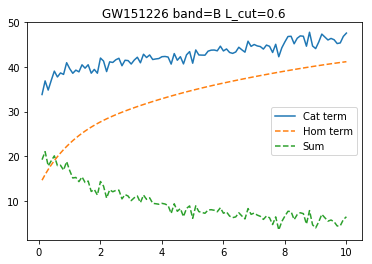

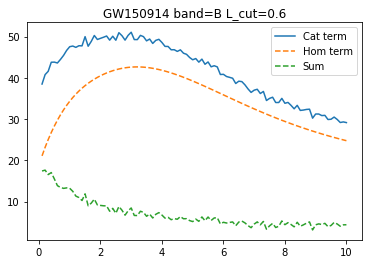

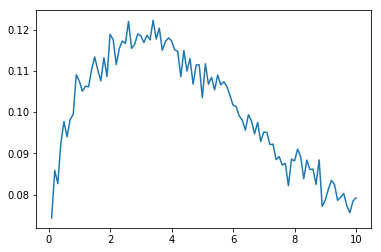

In [34]:


lik = np.squeeze(np.ones((H0grid.size, Xi0grid.size)))
bet = np.squeeze(np.ones((H0grid.size, Xi0grid.size)))


for key, val in liks.items():

    r, _, _, _ = O2[key].find_r_loc()
    #d = O2[key].d_max()
    d = r*1.5
    beta = 1 / np.array([Xi(z_from_dLGW(d, Xi0=Xi0, n=nGlob, H0 = 70), Xi0, n=nGlob)*(1+z_from_dLGW(d, Xi0=Xi0, n=nGlob, H0 = 70)) for Xi0 in Xi0grid])**3
    #beta = 1 / (1+np.array([z_from_dLGW(r*1.5, Xi0=Xi0, n=nGlob, H0 = 70) for Xi0 in Xi0grid]))**3
    #plt.figure(figsize=(20,10))
    beta = bfitres
    plt.plot(Xi0grid, (val[0]+1*val[1])/beta)
    plt.plot(Xi0grid, val[0]/beta,'--')
    plt.plot(Xi0grid, 1*val[1]/beta,'--')
    

    plt.legend(["Cat term", "Hom term", "Sum"])
    plt.title( key + " band=" + band + " L_cut=" + str(Lcut) )
    plt.show()
    
    
    lik *= (val[0] + val[1] )
    bet *= beta

    
norm=np.trapz(lik/bet, Xi0grid)
plt.plot(Xi0grid, lik/bet/norm)
plt.show()

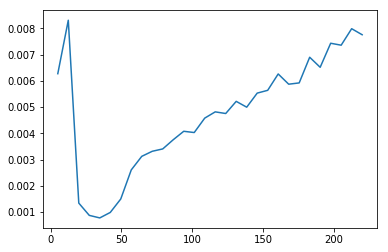

In [133]:
# # Plot the posterior with beta=H0^3
# plt.imshow(lik, extent=[Xi0grid[0],Xi0grid[-1],H0grid[0],H0grid[-1]])
# plt.colorbar()


# plt.show()


# norm=np.trapz(lik[:,0]/H0grid**3, H0grid)
# plt.plot(H0grid, lik[:,0]/H0grid**3/norm)
# plt.show()

norm=np.trapz(lik/bet, H0grid)
plt.plot(H0grid, lik/bet/norm)
plt.show()

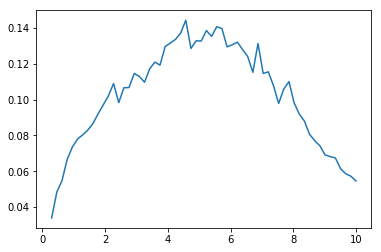

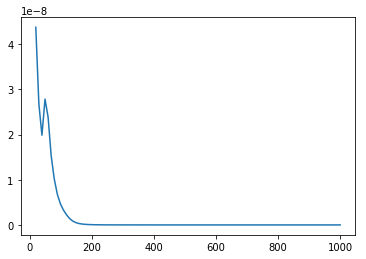

In [170]:
plt.plot(H0grid[:], lik_inhom[:]/H0grid[:]**6)

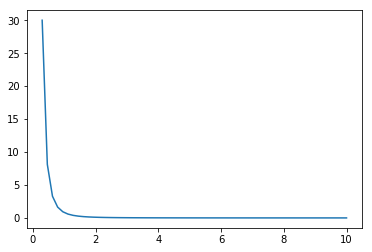

In [97]:
beta = 1 / np.array([Xi0*(1+z_from_dLGW(300, Xi0=Xi0, n=nGlob, H0 = 70)) for Xi0 in Xi0grid])**3
plt.plot(Xi0grid, beta)

In [253]:
gals.eval_hom(theta = np.array([0, 0, 1,1]), phi = np.array([0,1, 0, 1]), z=np.array(4*[0.1]))

array([0.99284882, 0.99284882, 0.97867915, 0.98610612])

In [263]:
dVdcom_dVdLGW(0.1, H0=70, Xi0=1, n=nGlob)

0.687305805934098

(100, 200)


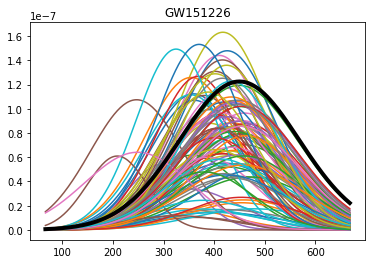

(100, 200)


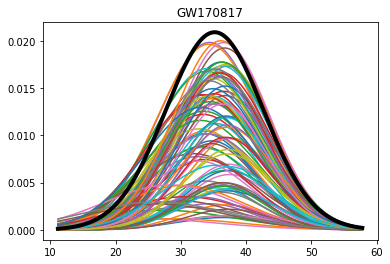

(100, 200)


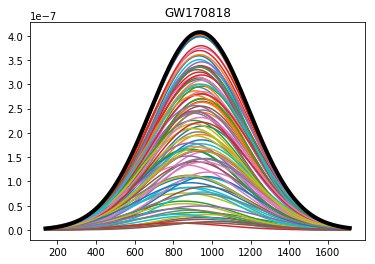

(100, 200)


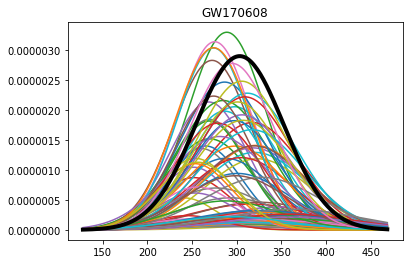

(100, 200)


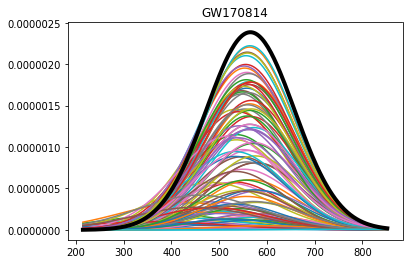

(100, 200)


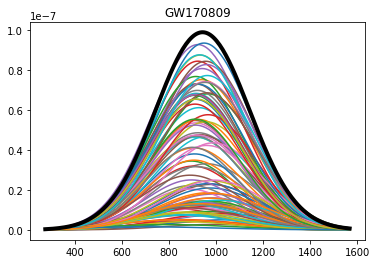

(100, 200)


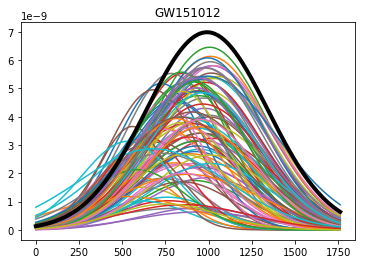

(100, 200)


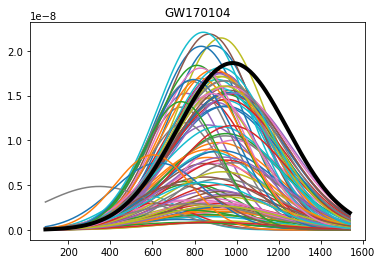

(100, 200)


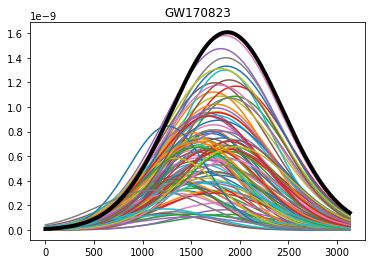

(100, 200)


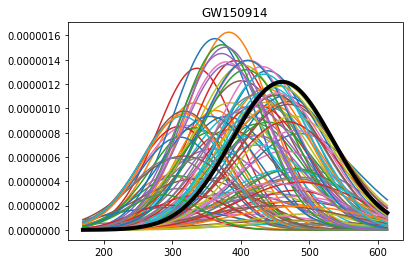

In [204]:
for key, ev in O2.items():
    mu, l, u, sig = ev.find_r_loc(std_number=3)
    r = np.linspace(l, u, 200)
    theta, phi, _ = ev.sample_posterior(nSamples=100)
    
    theta = theta[:, None]
    phi = phi[:, None]
    resMax = ev.likelihood(r, *ev.find_event_coords(polarCoords=True))
    r = r[None, :]
    res = ev.likelihood(r, theta, phi)
    print(res.shape)
    plt.plot(np.squeeze(r), res.T)
    plt.plot(np.squeeze(r), resMax, c='k', linewidth=4)
    plt.title(key)
    plt.show()
    


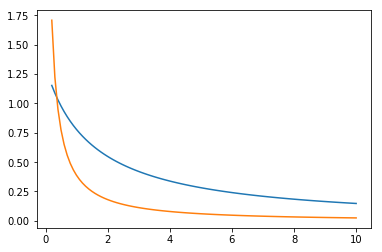

In [285]:
Xi0grid = np.linspace(0.2,10,100)
d = 400
beta1 = 1 / np.array([Xi(z_from_dLGW(d, Xi0=Xi0, n=nGlob, H0 = 70), Xi0, n=nGlob)*(1+z_from_dLGW(d, Xi0=Xi0, n=nGlob, H0 = 70)) for Xi0 in Xi0grid])**3
d = 2000
beta2 = 1 / np.array([Xi(z_from_dLGW(d, Xi0=Xi0, n=nGlob, H0 = 70), Xi0, n=nGlob)*(1+z_from_dLGW(d, Xi0=Xi0, n=nGlob, H0 = 70)) for Xi0 in Xi0grid])**3

plt.plot(Xi0grid, beta1, Xi0grid, beta2)

In [334]:
from Xi0Stat.betaMC import BetaMC
lims = PriorLimits()
lims.Xi0Min=0.01
lims.Xi0Max=100
lims.H0Min=70
lims.H0Max=70
Xi0grid = np.linspace(0.1,10,50)
b = BetaMC(priorlimits=lims, verbose=True,nSamples=1000000)
#betaH0 = np.array([b.compute_at(H0=H0, Xi0=1) for H0 in H0grid])
betaXi03 = np.array([b.compute_at(H0=70, Xi0=Xi0, gamma=0.5) for Xi0 in Xi0grid])
 
#beta2 = 1 / np.array([Xi(z_from_dLGW(d, Xi0=Xi0, n=nGlob, H0 = 70), Xi0, n=nGlob)*(1+z_from_dLGW(d, Xi0=Xi0, n=nGlob, H0 = 70)) for Xi0 in Xi0grid])**3
 

Loading strain sensitivity from /Users/af/Work/Cosmo/codes/Xi0Stat/Xi0Stat/../data/GW/detectors/2017-08-06_DCH_C02_L1_O2_Sensitivity_strain_asd.txt...
Largest distance detected in sample is 1978.0257460056175
Largest distance detected in sample is 2001.3244841615322
Largest distance detected in sample is 2022.8426739199106
Largest distance detected in sample is 1655.31074828152
Largest distance detected in sample is 1840.70481348352
Largest distance detected in sample is 1648.1747230219964
Largest distance detected in sample is 1625.120902122176
Largest distance detected in sample is 1641.1918650168425
Largest distance detected in sample is 1352.6207207212342
Largest distance detected in sample is 1558.9384746138078
Largest distance detected in sample is 1378.5532007238915
Largest distance detected in sample is 1869.8209293574548
Largest distance detected in sample is 1512.4830728140573
Largest distance detected in sample is 1835.5709369049557
Largest distance detected in sample is 158

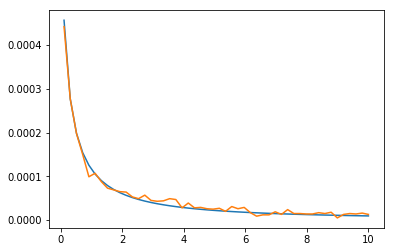

In [343]:
d=1300
betaXi02 = 1 / np.array([Xi(z_from_dLGW(d, Xi0=Xi0, n=nGlob, H0 = 70), Xi0, n=nGlob)*(1+z_from_dLGW(d, Xi0=Xi0, n=nGlob, H0 = 70)) for Xi0 in Xi0grid])**3
 

#plt.plot(Xi0grid, betaXi0)
plt.plot(Xi0grid, betaXi02*betaXi03[1]/betaXi02[1])
plt.plot(Xi0grid, np.array(betaXi03))#*betaXi0[1]/betaXi03[1])

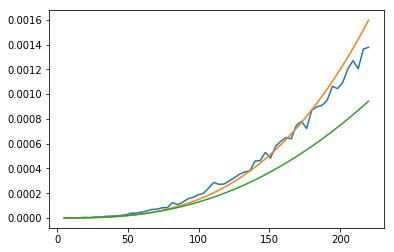

In [323]:
d = 500
beta2 = H0grid**3 / (1+np.array([z_from_dLGW(d, Xi0=1, n=nGlob, H0 = h) for h in H0grid]))**3
 

plt.plot(H0grid, beta)
plt.plot(H0grid, 0.00000000015*H0grid**3)
plt.plot(H0grid, 0.7*0.00000000028*beta2)

In [197]:
gals.get_inhom_contained(np.linspace(0.005,1,6), 16)

(array([2906, 2867, 2906, ..., 2767, 2767, 2897]),
 array([[3.43936370e+02, 1.92689799e+02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [1.55023702e+02, 8.68517802e+01, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [3.01465837e+02, 1.68895751e+02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 4.20968883e+02, 2.24524355e-11, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [2.03314061e+01, 4.36767178e+02, 1.89612008e-11, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.42869237e+02, 5.43579984e-11, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00]]))

In [268]:
from Xi0Stat.globals import *
h7 = 220/70 
print(Xi(z=2.358473740319262, Xi0=1,n=nGlob)*dL70fast(2.358473740319262
)/h7)

6046.247806837064


In [267]:
Xi(z=2.358473740319262, Xi0=1,n=nGlob)

1.0

In [288]:
z_from_dLGW(1000, H0=220, Xi0=0.01, n=nGlob)

2.358473740319262

In [266]:
Xi0minGlob

1

In [287]:
b.zmax

2.358473740319262

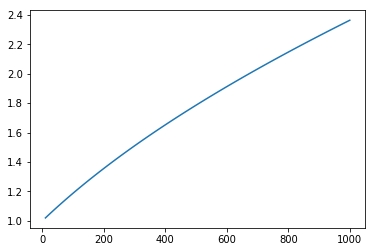

In [120]:
sizeevent = 100
hordist = 300
H0s = np.linspace(10,1000,100)
bratio =  (1+np.array([z_from_dLGW(hordist, Xi0=1, n=nGlob, H0 = h) for h in H0s]))**3 /  (1+np.array([z_from_dLGW(sizeevent, Xi0=1, n=nGlob, H0 = h) for h in H0s]))**3
plt.plot(H0s, bratio)

In [34]:
foo = lambda x: np.zeros(np.atleast_1d(x).shape)

In [37]:
foo([20, 30])


array([0., 0.])